# WIN Prediction Analysis

## Steps to be followed:
    1.Understand the problem and Objectives
    2.Understand the data/ Develop some business sense
    3.Exploratory Data Analysis
    4.Provide the results and understanding by performing exploratory data analysis.
    5.Data Cleaning
    6.Model building (trying various techniques and at the end justify and choose a technique over the others)
    7.Testing and cross validation
    8.Recommed top 5 combination of SBU Head-Bid Manager.
    9.For every false prediction calculate the loss occured to company.
    10.Find the results, recommendation and visualizations
    11.Bonus: Any other insight or recommendation from the data which will help the business(optional).
    12.Prepare deck

##  Understand the problem and objectives
  ### Overview Of the problem - 
We need to analyze and predict the winning possibility of deal for an IT firm based on data from CRM(Customer relationship management) system given to us from 2011 -2019 and see how the possibilities of winning a deal is impacted by other factors
This will enable the IT consulting company to manage the effort required to win a deal to meet the growth targets.

### Objectives
Objective 1: Build a ML model to predict the probability of win/loss for bidding deals for a potential client  

Objective 2: Identify variable/s that are most likely to help in converting an opportunity into a win.

Objective 3: Recommend top 5 combination of SBU Head-Bid Manager.

Objective 4: For every false prediction calculate the loss occured to company.

## Importing packages and Dataset

In [426]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os as os

In [427]:
os.getcwd()

'C:\\Users\\hp\\Desktop\\Python new'

In [428]:
os.chdir('C:\\Users\\hp\\Desktop\\Python new')

In [429]:
data= pd.read_excel('Win_Prediction_Data.xlsx')

## Understanding the data

In [430]:
#Overview of data
data.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [431]:
#Data shape
data.shape

(10061, 9)

In [432]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [433]:
data.describe(include="object")

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Status Code
count,9982,10061,10061,10061,10061,10061,10061
unique,41,67,25,13,43,278,2
top,Others,Solution 32,Sector 23,L10,Mervin Harwood,Molly Eakes,Lost
freq,1763,1439,2693,3360,1166,323,6306


In [434]:
data['Deal Cost'].describe().round(2)

count       10061.00
mean       766896.87
std       1619893.80
min             0.00
25%        189705.88
50%        382352.94
75%        764705.88
max      36764705.88
Name: Deal Cost, dtype: float64

In [435]:
# Deal Date range
print('First deal:{}\nLast Deal:{}'.format(data['Deal Date'].min(),data['Deal Date'].max()))

First deal:2011-04-19 00:00:00
Last Deal:2019-06-07 00:00:00


In [436]:
#checking the counts for Target Variable

data['Deal Status Code'].value_counts()

Lost    6306
Won     3755
Name: Deal Status Code, dtype: int64

In [437]:
count_lost = len(data[data['Deal Status Code']=='Lost'])
count_won = len(data[data['Deal Status Code']=='Won'])
pct_of_lost = count_lost/(count_lost+count_won)
print("percentage of lossing the deal is", pct_of_lost*100)
pct_of_won = count_won/(count_lost+count_won)
print("percentage of winning the deal is", pct_of_won*100)

percentage of lossing the deal is 62.677666235960636
percentage of winning the deal is 37.322333764039364


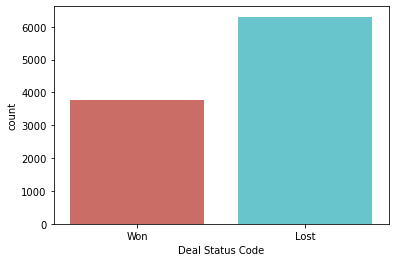

<Figure size 432x288 with 0 Axes>

In [438]:
import seaborn as sns
sns.countplot(x='Deal Status Code',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

In [439]:
#Checking unique values for each column.

data.nunique()

Client Category       41
Solution Type         67
Deal Date           2555
Sector                25
Location              13
VP Name               43
Manager Name         278
Deal Cost           1469
Deal Status Code       2
dtype: int64

From the above analysis, we understand that total records in this dataset is 10061 and there are total 9 features.
Our Target variable is 'Deal Status Code'under which we can see that 63% deals were lost and only 37% are won. We have 79 null records in client category and in deal cost min value is '0'. Also there is presence of multiple labels in each category.
#### Data was given from 2011-2018, but we have found that there is data for year 2019 as well so we are considering it as it is

##  Data Cleaning 

In [440]:
data.columns

Index(['Client Category', 'Solution Type', 'Deal Date', 'Sector', 'Location',
       'VP Name', 'Manager Name', 'Deal Cost', 'Deal Status Code'],
      dtype='object')

In [441]:
# Removing space from column names
data.columns=['Client_Category','Solution_Type','Deal_Date','Sector',
               'Location','VP_Name','Manager_Name','Deal_Cost','Deal_Status_Code']

##### Checking for Duplicate rows

In [442]:
##total count for duplicate rows
data.duplicated().sum()

14

In [443]:
# Extract duplicate rows 
data.loc[data.duplicated(), :]

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code
3036,Domestic Public Bank,Solution 32,2015-03-20,Sector 2,L7,Rosanna Maynez,Earline Langton,735294.12,Lost
3385,Tech,Solution 32,2015-07-31,Sector 2,L10,Long Bergstrom,Emil Knudsen,235294.12,Lost
3880,Telecom,Solution 12,2013-08-30,Sector 24,Others,Mangesh K. Singh,Sohil Kumar,588235.29,Lost
5037,Tech,Solution 13,2012-05-08,Sector 23,L5,Sargar Deep Rao,Karan Dubey,0.00,Lost
7637,Govt,Solution 34,2018-02-21,Sector 4,L10,Mervin Harwood,Akshay Sharma,602941.18,Lost
7705,Internal,Solution 9,2015-01-06,Sector 20,Others,Sargar Deep Rao,Brenton Launius,2120294.12,Lost
7718,Services_based,Solution 26,2018-02-11,Sector 17,L10,Molly Eakes,vansu dev,264705.88,Lost
8020,Internal,Solution 9,2015-07-02,Sector 2,L9,Sargar Deep Rao,Rahul Kocher,264705.88,Lost
8167,Infrastructure,Solution 9,2015-05-18,Sector 24,L10,Mervin Harwood,nahar singh,352941.18,Lost
8177,Services_based,Solution 9,2015-10-03,Sector 23,L1,Ankita Aggarwal,bhagwati prasad,147058.82,Lost


In [444]:
#dropping duplicate rows from data
data1=data.drop_duplicates()

In [445]:
# Revised shape of data
data1.shape

(10047, 9)

We found 14 dublicate rows in our data hence dropped them all

##### Checking Missing Values

In [446]:
data1.isnull().sum()

Client_Category     79
Solution_Type        0
Deal_Date            0
Sector               0
Location             0
VP_Name              0
Manager_Name         0
Deal_Cost            0
Deal_Status_Code     0
dtype: int64

<AxesSubplot:>

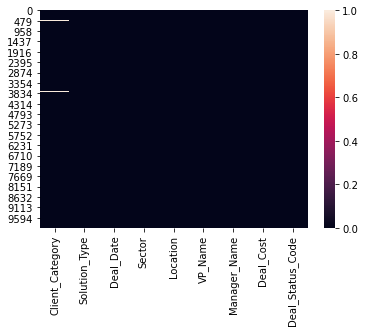

In [447]:
#heatmap for missing values

sns.heatmap(data1.isnull())

In [448]:
#calculate mode for replacing missing values
data1.mode(axis=0,dropna=True)

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code
0,Others,Solution 32,2018-01-31,Sector 23,L10,Mervin Harwood,Molly Eakes,294117.65,Lost
1,NaN,NaN,2018-07-27,NaN,NaN,NaN,NaN,NaN,NaN


In [449]:
# Checking value counts for Client Category
data1['Client_Category'].value_counts().head(5)

Others                  1762
Internal                1451
Services_based          1200
Tech                     911
Domestic Public Bank     418
Name: Client_Category, dtype: int64

In [450]:
#Replacing missing values for 'Client Category' with mode.

data1['Client_Category']=data1['Client_Category'].fillna('Others')

In [451]:
data1.isnull().sum()

Client_Category     0
Solution_Type       0
Deal_Date           0
Sector              0
Location            0
VP_Name             0
Manager_Name        0
Deal_Cost           0
Deal_Status_Code    0
dtype: int64

From above we found 79 cases where values were missing in case of Client category. Hence we replaced all the missing values with the category with highest frequency (mode) i.e. Others.
Now there are no missing values in the data

##### Checking for rows with same VP and Manager names

In [452]:
# Checking rows where VP and Manager columns have same name.
print(data1[data1['VP_Name']==data1['Manager_Name']])
len(data1[data1['VP_Name']==data1['Manager_Name']])

      Client_Category Solution_Type  Deal_Date     Sector Location  \
26         Consulting   Solution 32 2012-01-25  Sector 23      L10   
52               Tech   Solution 32 2011-11-02  Sector 23      L10   
61               Tech   Solution 32 2012-04-08  Sector 23      L10   
68               Tech   Solution 32 2012-02-18  Sector 23      L10   
99               Tech   Solution 32 2011-12-29  Sector 23      L10   
...               ...           ...        ...        ...      ...   
9339           Others    Solution 9 2018-01-07  Sector 13      L12   
9345           Others    Solution 9 2017-11-10  Sector 13      L12   
9352        Power ind   Solution 39 2018-06-26   Sector 9      L10   
10056       Power ind    Solution 9 2019-03-18   Sector 9       L5   
10058       Power ind    Solution 9 2019-02-28   Sector 9       L5   

                VP_Name      Manager_Name   Deal_Cost Deal_Status_Code  
26     Mangesh K. Singh  Mangesh K. Singh   279411.77              Won  
52     Manges

122

In [453]:
Vp_Manager_same=data1[data1['VP_Name']==data1['Manager_Name']]
Vp_Manager_same['Deal_Cost'].sum()

89325588.23000002

From above we can see that there are 122 rows where vp and manager name are same,also the deal cost for these rows is very high (89,325,588) so we cannot drop these rows,so we are keeping them as it is.

##### Checking for rows with '0' Deal cost

In [454]:
data1 = data1[data1["Deal_Cost"] == 0 ]
data1

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code
79,Govt,Solution 37,2011-11-20,Sector 12,L5,Ekta Zutshi,shafibul,0.0,Lost
95,Others,Solution 31,2011-11-07,Sector 16,L5,Rosanna Maynez,Ankita Aggarwal,0.0,Lost
139,Govt,Solution 37,2012-02-06,Sector 12,L5,Ekta Zutshi,shafibul,0.0,Lost
150,Others,Solution 31,2012-03-23,Sector 16,L5,Rosanna Maynez,Ankita Aggarwal,0.0,Lost
210,Domestic Public Bank,Solution 59,2012-06-12,Sector 2,L10,Mervin Harwood,Lino Batterton,0.0,Lost
...,...,...,...,...,...,...,...,...,...
7886,Retail_market,Solution 9,2014-11-24,Sector 23,L10,Mangesh K. Singh,Fredricka Bald,0.0,Lost
7903,Tech,Solution 9,2015-05-31,Sector 2,L10,Rosanna Maynez,Fredricka Bald,0.0,Lost
7907,Tech,Solution 9,2014-12-21,Sector 2,L10,Rosanna Maynez,Fredricka Bald,0.0,Lost
7921,Retail_market,Solution 9,2014-12-21,Sector 23,L10,Mangesh K. Singh,Fredricka Bald,0.0,Lost


Here we can see that we have 245 rows where deal cost is '0' which is pratically not possible ,so we have replaced these 0's with average deal cost of their corresponding client category with respect to their solution type and sector.

In [455]:
#We performed this action in MS Excel. Thus reading the excel file again.
win_data= pd.read_excel('Win Prediction_Finaldata.xlsx')

In [456]:
win_data.shape

(10047, 9)

In [457]:
win_data

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
...,...,...,...,...,...,...,...,...,...
10042,Power ind,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10043,Internal,Solution 6,2019-03-04,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.82,Won
10044,Power ind,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10045,Power ind,Solution 62,2019-01-27,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,Won


Now the data is cleaned and we can move forward for further analysis

## Exploratory Data Analysis

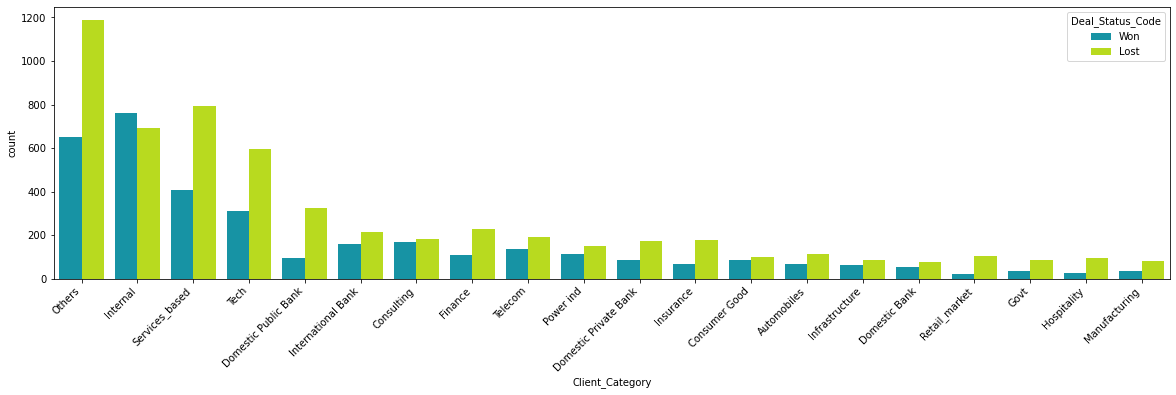

In [458]:
# Won and Lost analysis for Top 20 Client category

plt.figure(figsize = (20,5))
sns.countplot(win_data['Client_Category'], 
              hue = win_data['Deal_Status_Code'], 
              order = win_data['Client_Category'].value_counts().nlargest(20).index,
             palette = "nipy_spectral")
plt.xticks(rotation = 45, ha = "right");

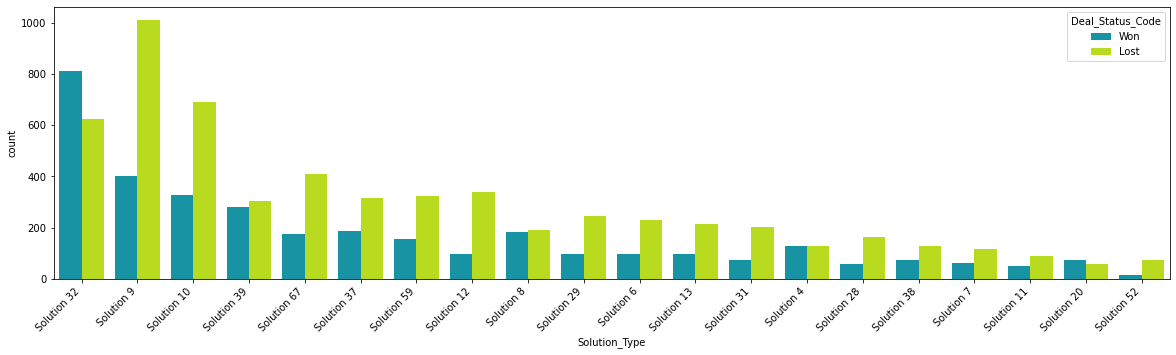

In [459]:
# Won and Lost analysis for Top 20 Solution Type

plt.figure(figsize = (20,5))
sns.countplot(win_data['Solution_Type'], 
              hue = win_data['Deal_Status_Code'], 
              order = win_data['Solution_Type'].value_counts().nlargest(20).index,
             palette = "nipy_spectral")
plt.xticks(rotation = 45, ha = "right");

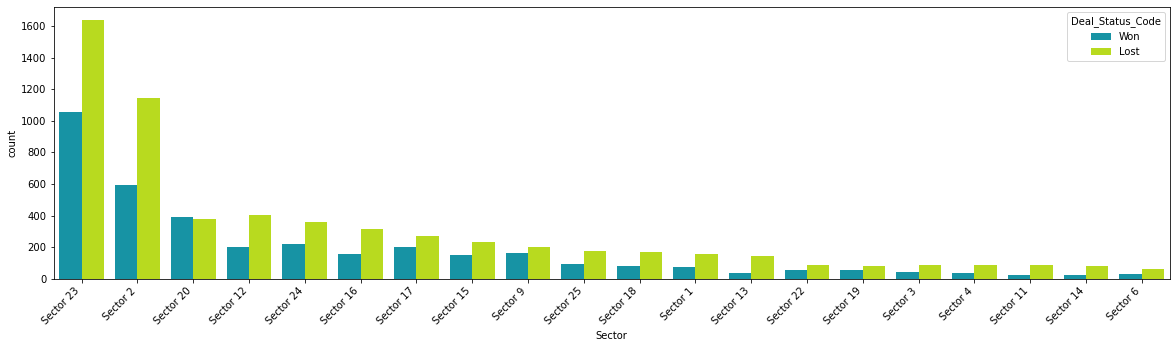

In [460]:
# Won and Lost analysis for  Top 20 Sector

plt.figure(figsize = (20,5))
sns.countplot(win_data['Sector'], 
              hue = win_data['Deal_Status_Code'], 
              order = win_data['Sector'].value_counts().nlargest(20).index,
             palette = "nipy_spectral")
plt.xticks(rotation = 45, ha = "right");

In [461]:
#We are combining VP and Manager column 

new = win_data["Manager_Name"].copy()

win_data["Vp&Manager_Combo"]= win_data["VP_Name"].str.cat(new, sep =" - ")

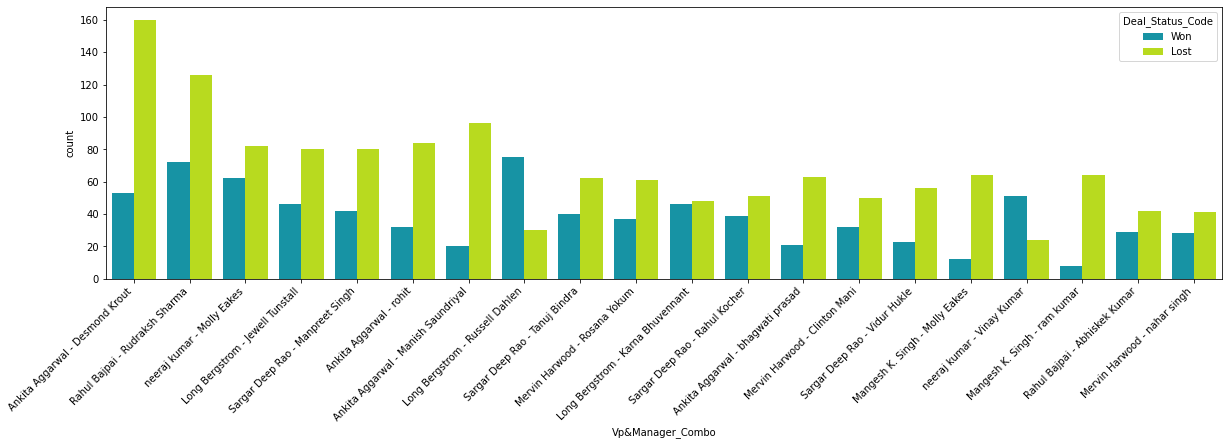

In [462]:
# Won and Lost analysis for top 20 VP and Manager Combo

plt.figure(figsize = (20,5))
sns.countplot(win_data['Vp&Manager_Combo'], 
              hue = win_data['Deal_Status_Code'], 
              order = win_data['Vp&Manager_Combo'].value_counts().nlargest(20).index,
             palette = "nipy_spectral")
plt.xticks(rotation = 45, ha = "right");

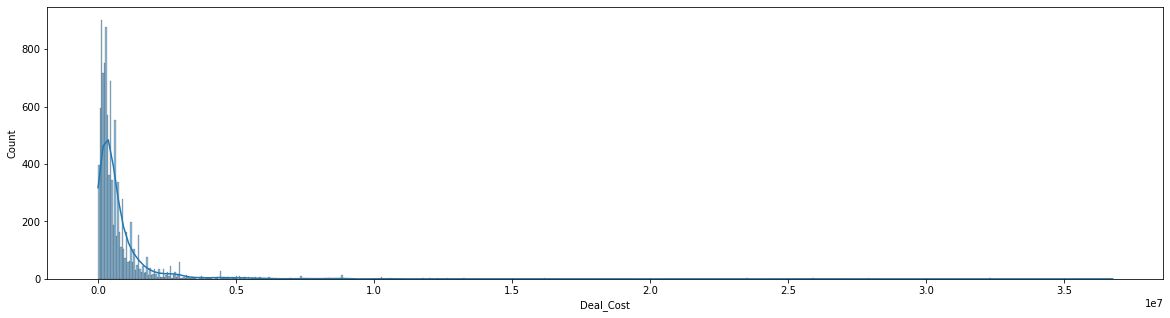

In [463]:
plt.figure(figsize = (20,5))
sns.histplot(win_data['Deal_Cost'], kde = True);

<AxesSubplot:xlabel='Deal_Year', ylabel='count'>

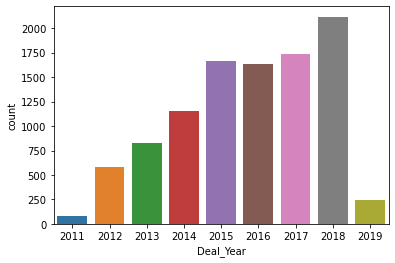

In [464]:
# Total Count of deals yearwise

win_data['Deal_Year'] = pd.DatetimeIndex(win_data['Deal_Date']).year

sns.countplot(win_data["Deal_Year"])

In [465]:
# Total Count of deals Monthwise
win_data['MONTH'] = pd.DatetimeIndex(win_data['Deal_Date']).month_name()
win_data['MONTH'].value_counts()

October      950
December     949
November     936
January      895
September    871
July         835
August       827
February     778
May          773
March        753
April        743
June         737
Name: MONTH, dtype: int64

<AxesSubplot:xlabel='MONTH', ylabel='count'>

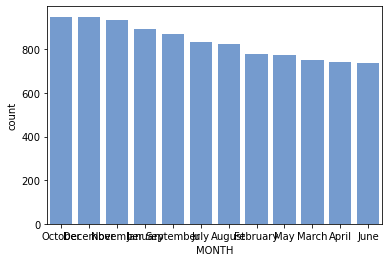

In [466]:
plt.figure(20,10)
sns.countplot(win_data['MONTH'],
                 order = win_data['MONTH'].value_counts().index,
                 color = "#69d")


In [467]:
win_data.groupby('Deal_Status_Code')[['Deal_Cost']].agg(["count","median"])

Deal_Cost           
                     count     median
Deal_Status_Code                     
Lost                  6292  441176.47
Won                   3755  347058.82

### Observations from EDA
From above EDA we understand that-
- Count of lost deals is more that won deals with respect to all columns
- For Solution 32 and Sector 23 count of total won deals is maximum
- Total count of deals is increasing yearly. Largest deals are made in year 2018
- Most of the deals are made in October month

Also from above table we understand that winning deals cost is less which means company is successful in winning small budget deals.

## Feature Engineering

In [468]:
win_data.head()

,Client_Category,Solution_Type,Deal_Date,Sector,Location,VP_Name,Manager_Name,Deal_Cost,Deal_Status_Code,Vp&Manager_Combo,Deal_Year,MONTH
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,Ekta Zutshi - Gopa Trilochana,2012,March
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,Ekta Zutshi - Gopa Trilochana,2012,September
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,Ekta Zutshi - Russell Dahlen,2011,August
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,Ekta Zutshi - Russell Dahlen,2011,April
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,Ekta Zutshi - Russell Dahlen,2011,June


In [469]:
#Dropping VP_Name ,Manager_Name column and Deal Date

df=win_data.drop(['VP_Name','Manager_Name','Deal_Date','MONTH'],axis=1)

In [470]:
#Final data shape

df.shape

(10047, 8)

In [471]:
df.columns

Index(['Client_Category', 'Solution_Type', 'Sector', 'Location', 'Deal_Cost',
       'Deal_Status_Code', 'Vp&Manager_Combo', 'Deal_Year'],
      dtype='object')

### Label encoding using sci-kit learn library approach

In [472]:
#Replacing deal status code with 1 & 0

df['Deal_Status_Code']=np.where(df['Deal_Status_Code']=='Won',1,0)

In [473]:
from sklearn.preprocessing import LabelEncoder

cols = ('Client_Category','Solution_Type','Sector','Location','Deal_Cost','Vp&Manager_Combo')

for c in cols:
    label_ec = LabelEncoder() 
    label_ec.fit(list(df[c].values)) 
    df[c] = label_ec.transform(list(df[c].values))

In [474]:
df.head()

,Client_Category,Solution_Type,Sector,Location,Deal_Cost,Deal_Status_Code,Vp&Manager_Combo,Deal_Year
0,39,64,16,7,236,1,161,2012
1,39,64,16,7,947,1,161,2012
2,19,54,12,12,83,0,186,2011
3,19,54,12,12,83,0,186,2011
4,19,25,12,12,114,0,186,2011


All the catergorical variables are converted into numerical data

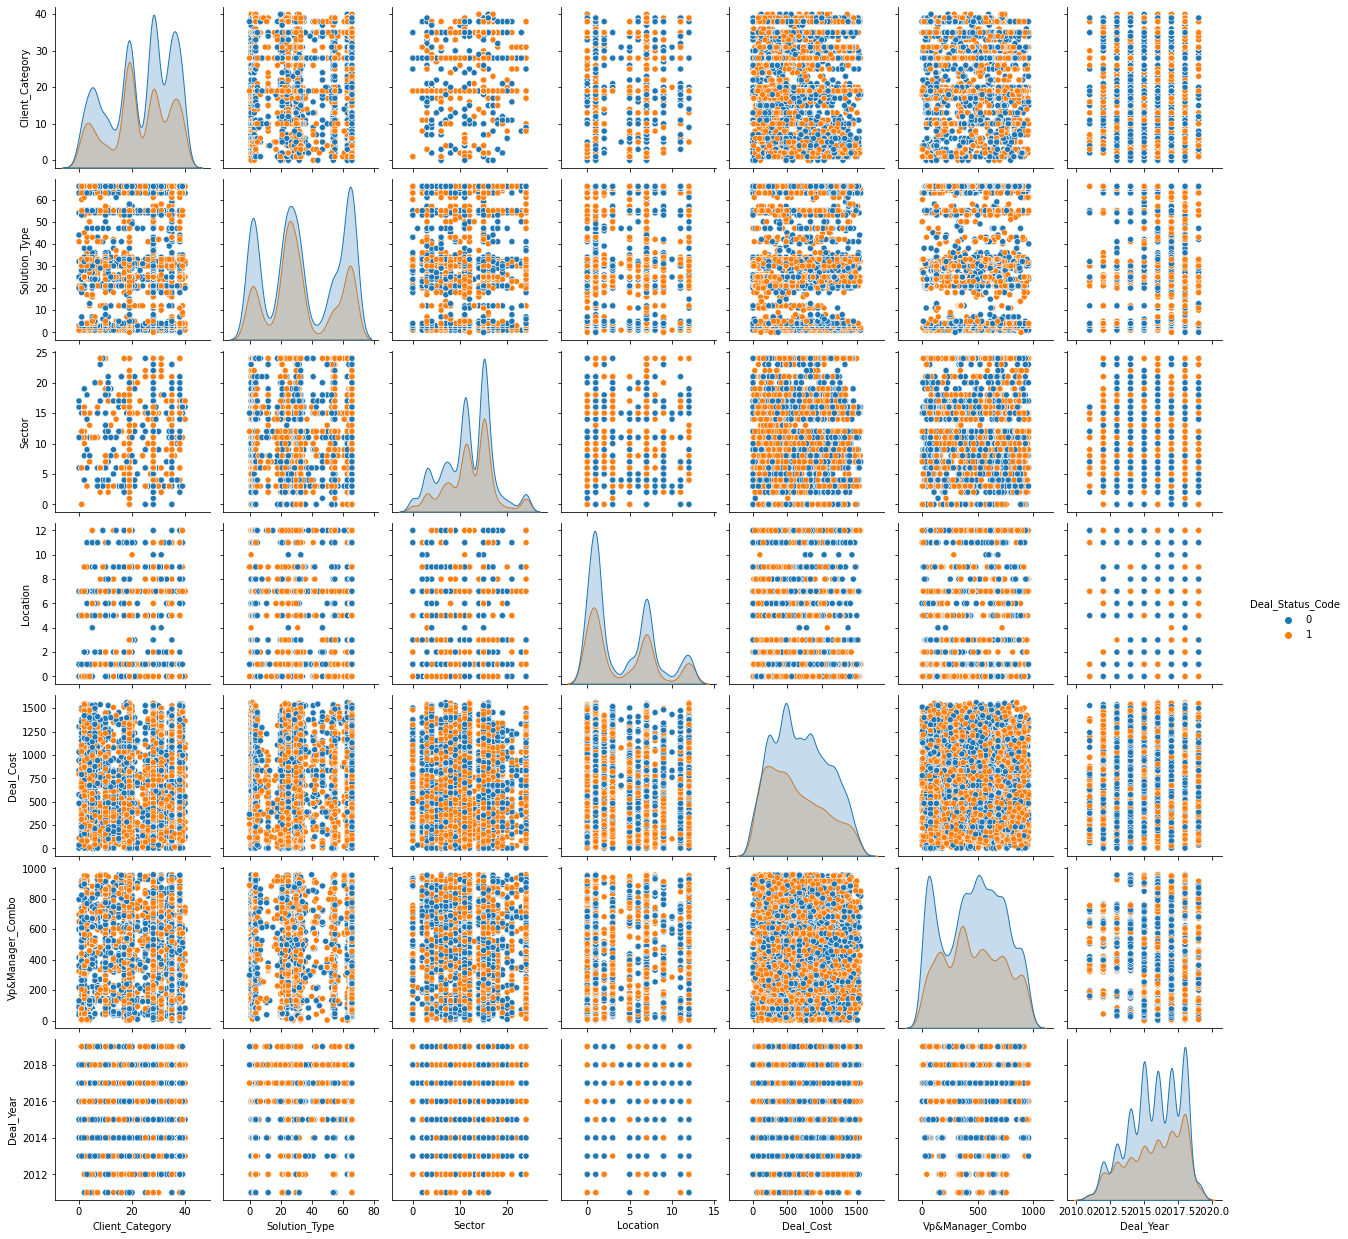

In [475]:
sns.pairplot(df, hue = 'Deal_Status_Code')

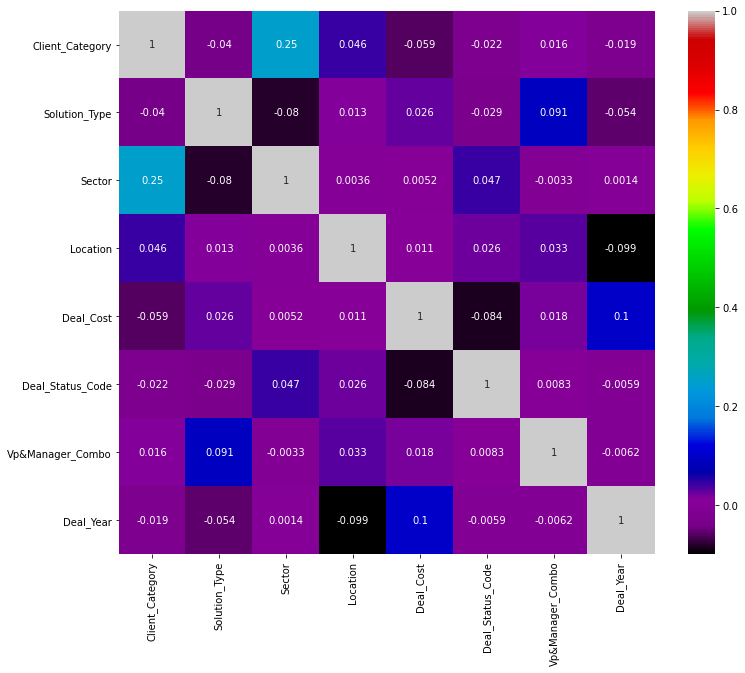

In [476]:
#Correlation plot

plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor,annot=True,cmap="nipy_spectral")
plt.show()

### Seperating target variable and predictors

In [477]:
X = df.drop(['Deal_Status_Code'],axis=1)
y = df['Deal_Status_Code']

In [478]:
print(X.shape)
print(y.shape)

(10047, 7)
(10047,)


## Feature Selection

Performing chi-square test for all the categorical variales

In [479]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10047 entries, 0 to 10046
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Client_Category   10047 non-null  int32
 1   Solution_Type     10047 non-null  int32
 2   Sector            10047 non-null  int32
 3   Location          10047 non-null  int32
 4   Deal_Cost         10047 non-null  int64
 5   Vp&Manager_Combo  10047 non-null  int32
 6   Deal_Year         10047 non-null  int64
dtypes: int32(5), int64(2)
memory usage: 353.3 KB


In [480]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(X,y)

In [481]:
f_p_values

(array([2.80329320e+01, 1.31485233e+02, 4.98878969e+01, 2.46117073e+01,
        1.68401970e+04, 1.06983425e+02, 6.38742064e-04]),
 array([1.19268403e-07, 1.93911498e-30, 1.62785695e-12, 7.01244107e-07,
        0.00000000e+00, 4.48908259e-25, 9.79836933e-01]))

In [482]:
p_values=pd.Series(f_p_values[1]).round()
p_values.index=X.columns
p_values.sort_index(ascending=True)

Client_Category     0.0
Deal_Cost           0.0
Deal_Year           1.0
Location            0.0
Sector              0.0
Solution_Type       0.0
Vp&Manager_Combo    0.0
dtype: float64

We calculate the chi-square statistics between every feature variable and the target variable and observe the existence of a relationship between the variables and the target to determine the dependency between variables.

#### Null Hypothesis (Ho): There is no association between feature and target variable.
#### Alternate Hypothesis (Ha): There is association between feature and target variable.
#### If p-value < alpha value ,Reject Ho and accpet Ha.

#### Since  p-values for all the features except Deal Year is less than alpha value (0.05) at 5% level of significance. So we will drop Deal Year and proceed further for our model buliding

In [483]:
X = X.drop(['Deal_Year'],axis=1)

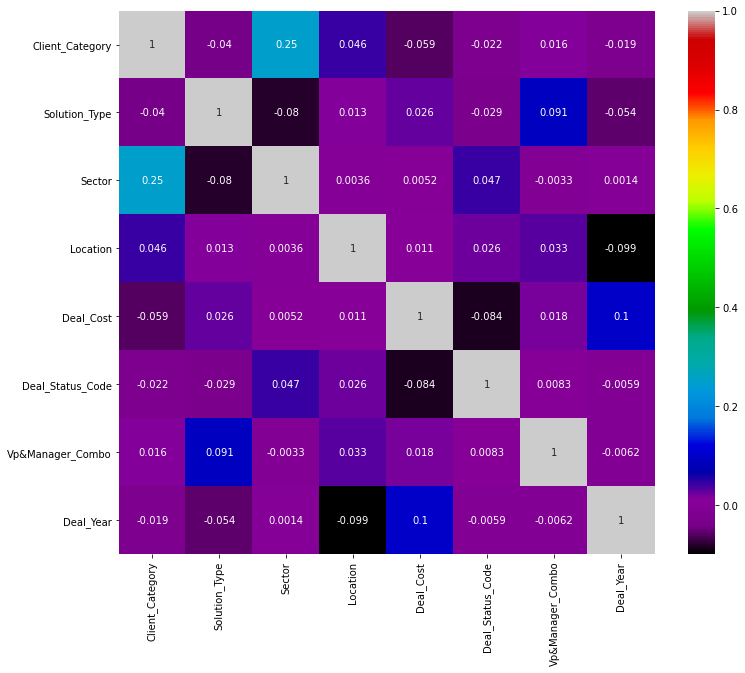

In [484]:
# Correlation matrix for selected features

corr_matrix = X.corr() 

#plot correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True,cmap="nipy_spectral")
plt.show()

In [485]:
X.head(5)

,Client_Category,Solution_Type,Sector,Location,Deal_Cost,Vp&Manager_Combo
0,39,64,16,7,236,161
1,39,64,16,7,947,161
2,19,54,12,12,83,186
3,19,54,12,12,83,186
4,19,25,12,12,114,186


In [486]:
X.shape

(10047, 6)

Thus we have our final selected features as-

Input Variables:
Client category, Solution type, Sector, Location, Deal cost and VP & Manager combo

Target Variable:
Deal Status Code

Now We will build our model using these input and target variables

#### Splitting dataset into training and testing data

In [487]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [488]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7032, 6)
(3015, 6)
(7032,)
(3015,)


### Standarising input data

In [489]:
# apply the min-max scaling (our output variable is 0 &1 ,so we are bringing all the cols in 0-1 range)

from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

x_train_scaled=pd.DataFrame(min_max.fit_transform(x_train),
columns=x_train.columns.tolist())

x_test_scaled=pd.DataFrame(min_max.fit_transform(x_test),
columns=x_test.columns.tolist())

In [490]:
x_train_scaled.head()

,Client_Category,Solution_Type,Sector,Location,Deal_Cost,Vp&Manager_Combo
0,0.950,0.015152,0.625000,0.583333,0.055805,0.670146
1,0.650,0.954545,0.416667,0.083333,0.361129,0.410230
2,0.700,0.818182,0.083333,0.583333,0.408595,0.195198
3,0.700,1.000000,0.625000,0.166667,0.218089,0.363257
4,0.025,0.303030,0.458333,0.083333,0.162284,0.039666


In [491]:
x_test_scaled.head()

,Client_Category,Solution_Type,Sector,Location,Deal_Cost,Vp&Manager_Combo
0,0.075,0.954545,0.125000,0.000000,0.128846,0.405631
1,0.250,0.045455,0.291667,0.416667,0.308974,0.240876
2,0.375,0.500000,0.708333,0.583333,0.849359,0.709072
3,0.150,0.818182,0.458333,0.916667,0.944231,0.527633
4,0.875,0.045455,0.625000,0.750000,0.660256,0.483837


## Model Building

#### Since our data is categorical we will apply Classification models on our data. 
We applied models like Decision Tree classifier, Random Forest classifier, Bagging Classifier, Adaboost Classifier, Naive Bayes, KNN and indentified the model with highest accuracy.

### Decision Tree Classifier

In [492]:
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

clf_DT=DecisionTreeClassifier(criterion='gini',random_state=0)

#creating model using train data
model_DT=clf_DT.fit(x_train_scaled,y_train)

#prediction on test data
y_pred_DT=model_DT.predict(x_test_scaled)

print('Accuracy:',metrics.accuracy_score(y_test,y_pred_DT))
print(confusion_matrix(y_test,y_pred_DT))
print(classification_report(y_test,y_pred_DT))

Accuracy: 0.7784411276948591
[[1647  207]
 [ 461  700]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1854
           1       0.77      0.60      0.68      1161

    accuracy                           0.78      3015
   macro avg       0.78      0.75      0.75      3015
weighted avg       0.78      0.78      0.77      3015



### Random Forest Classifier

In [493]:
from sklearn.ensemble import RandomForestClassifier

clf_RF=RandomForestClassifier(random_state=0)

#train model
model_RF=clf_RF.fit(x_train_scaled,y_train)

#prediction
y_pred_RF=model_RF.predict(x_test_scaled)
y_pred_RF

print('Accuracy:',metrics.accuracy_score(y_test,y_pred_RF))
print(confusion_matrix(y_test,y_pred_RF))
print(classification_report(y_test,y_pred_RF))

Accuracy: 0.7920398009950249
[[1725  129]
 [ 498  663]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1854
           1       0.84      0.57      0.68      1161

    accuracy                           0.79      3015
   macro avg       0.81      0.75      0.76      3015
weighted avg       0.80      0.79      0.78      3015



### Bagging Classifier

In [494]:
from sklearn.ensemble import BaggingClassifier

bagging=BaggingClassifier(model_RF,random_state=1)

#train model
model_BG=bagging.fit(x_train_scaled,y_train)

#Prediction
y_pred_BG=model_BG.predict(x_test_scaled)

print('Accuracy:',metrics.accuracy_score(y_test,y_pred_BG))
print(confusion_matrix(y_test,y_pred_BG))
print(classification_report(y_test,y_pred_BG))

Accuracy: 0.7807628524046435
[[1746  108]
 [ 553  608]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      1854
           1       0.85      0.52      0.65      1161

    accuracy                           0.78      3015
   macro avg       0.80      0.73      0.74      3015
weighted avg       0.79      0.78      0.77      3015



### Adaboost Classifier

In [495]:
from sklearn.ensemble import AdaBoostClassifier

clf_ABC1=AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state=0)

#train model
model_Ada=clf_ABC1.fit(x_train_scaled,y_train)

#Prediction
y_pred_Ada=model_Ada.predict(x_test_scaled)

print('Accuracy:',metrics.accuracy_score(y_test,y_pred_Ada))
print(confusion_matrix(y_test,y_pred_Ada))
print(classification_report(y_test,y_pred_Ada))

Accuracy: 0.6733001658374793
[[1630  224]
 [ 761  400]]
              precision    recall  f1-score   support

           0       0.68      0.88      0.77      1854
           1       0.64      0.34      0.45      1161

    accuracy                           0.67      3015
   macro avg       0.66      0.61      0.61      3015
weighted avg       0.67      0.67      0.64      3015



### Naive Bayes

In [496]:
from sklearn.naive_bayes import GaussianNB

naiv_bayes=GaussianNB()

#train model
model_NB=naiv_bayes.fit(x_train_scaled,y_train)

#prediction
y_pred_NB=model_NB.predict(x_test_scaled)

print('Accuracy:',metrics.accuracy_score(y_test,y_pred_NB))
print(confusion_matrix(y_test,y_pred_NB))
print(classification_report(y_test,y_pred_NB))

Accuracy: 0.6212271973466004
[[1834   20]
 [1122   39]]
              precision    recall  f1-score   support

           0       0.62      0.99      0.76      1854
           1       0.66      0.03      0.06      1161

    accuracy                           0.62      3015
   macro avg       0.64      0.51      0.41      3015
weighted avg       0.64      0.62      0.49      3015



### KNN Classifier

In [497]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
clf_knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
model_KNN= clf_knn.fit(x_train_scaled, y_train)

#Predict the response for test dataset
y_pred_KNN = model_KNN.predict(x_test_scaled)

print('Accuracy:',metrics.accuracy_score(y_test,y_pred_KNN))
print(confusion_matrix(y_test,y_pred_KNN))
print(classification_report(y_test,y_pred_KNN))

Accuracy: 0.6822553897180763
[[1494  360]
 [ 598  563]]
              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1854
           1       0.61      0.48      0.54      1161

    accuracy                           0.68      3015
   macro avg       0.66      0.65      0.65      3015
weighted avg       0.67      0.68      0.67      3015



### Summarising model performances

In [498]:
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy','Kappa Score']
models_report = pd.DataFrame(columns = cols)

tmp1 = pd.Series({'Model': " Decision Tree Classifier",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_DT),
                 'Precision Score': metrics.precision_score(y_test, y_pred_DT),
                 'Recall Score': metrics.recall_score(y_test, y_pred_DT),
                 'Accuracy': metrics.accuracy_score(y_test, y_pred_DT),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_DT)})
tmp2 = pd.Series({'Model': " Random Forest Classifier",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_RF),
                 'Precision Score': metrics.precision_score(y_test, y_pred_RF),
                 'Recall Score': metrics.recall_score(y_test, y_pred_RF),
                 'Accuracy': metrics.accuracy_score(y_test, y_pred_RF),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_RF)})
tmp3 = pd.Series({'Model': " Bagging Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_BG),
                 'Precision Score': metrics.precision_score(y_test, y_pred_BG),
                 'Recall Score': metrics.recall_score(y_test, y_pred_BG),
                 'Accuracy': metrics.accuracy_score(y_test, y_pred_BG),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_BG)})
tmp4 = pd.Series({'Model': " Adaboost Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_Ada),
                 'Precision Score': metrics.precision_score(y_test, y_pred_Ada),
                 'Recall Score': metrics.recall_score(y_test, y_pred_Ada),
                 'Accuracy': metrics.accuracy_score(y_test, y_pred_Ada),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_Ada)})
tmp5 = pd.Series({'Model': " Naive Bayes ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_NB),
                 'Precision Score': metrics.precision_score(y_test, y_pred_NB),
                 'Recall Score': metrics.recall_score(y_test, y_pred_NB),
                 'Accuracy': metrics.accuracy_score(y_test, y_pred_NB),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_NB)})
tmp6 = pd.Series({'Model': " KNN Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_pred_KNN),
                 'Precision Score': metrics.precision_score(y_test, y_pred_KNN),
                 'Recall Score': metrics.recall_score(y_test, y_pred_KNN),
                 'Accuracy': metrics.accuracy_score(y_test, y_pred_KNN),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_KNN)})

model_DT_report = models_report.append(tmp1,ignore_index = True)

model_RF_report= model_DT_report.append(tmp2,ignore_index = True)

model_BG_report= model_RF_report.append(tmp3,ignore_index = True)

model_ADA_report= model_BG_report.append(tmp4,ignore_index = True)

model_NB_report= model_ADA_report.append(tmp5,ignore_index = True)

model_KNN_report= model_NB_report.append(tmp6,ignore_index = True)

model_KNN_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy,Kappa Score
0,Decision Tree Classifier,0.745639,0.771775,0.602929,0.778441,0.512222
1,Random Forest Classifier,0.750740,0.837121,0.571059,0.792040,0.533149
2,Bagging Classifier,0.732717,0.849162,0.523686,0.780763,0.501348
3,Adaboost Classifier,0.611855,0.641026,0.344531,0.673300,0.244879
4,Naive Bayes,0.511402,0.661017,0.033592,0.621227,0.027722
5,KNN Classifier,0.645376,0.609967,0.484927,0.682255,0.302335


The Precision(PPV) is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The Recall(Sensitivity) is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

### It is evident from above table that Random Forest Classifier is having highest accuracy of 79 % as compared to other models hence we will do the final prediction based on this model.

## Objective 1 - Model selection and prediction

In [499]:
#prediction on test data using Random Forest classifier
y_pred_RF=model_RF.predict(x_test_scaled)
y_pred_RF

array([1, 0, 0, ..., 0, 0, 0])

In [500]:
#we will select optimal threshold value which will decide whether a particular record will fall in class 1 or 0.

def Find_Optimal_Cutoff(y_test,y_pred_RF):
    fpr,tpr,threshold =metrics.roc_curve(y_test,y_pred_RF)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

# Add prediction probability to dataframe
y_pred_proba=clf_RF.predict_proba(x_test_scaled)[::,1]

In [501]:
# Finding optimal probability threshold
threshold = Find_Optimal_Cutoff(y_test,y_pred_proba )
print(threshold)

[0.3133333333333333]


In [502]:
Predicted_Class = np.where(y_pred_proba>threshold,1,0)
Predicted_Class

array([1, 0, 0, ..., 0, 0, 0])

Accuracy: 0.8222222222222222
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1854
           1       0.75      0.82      0.78      1161

    accuracy                           0.82      3015
   macro avg       0.81      0.82      0.82      3015
weighted avg       0.83      0.82      0.82      3015



Text(0.5, 15.0, 'Predicted label')

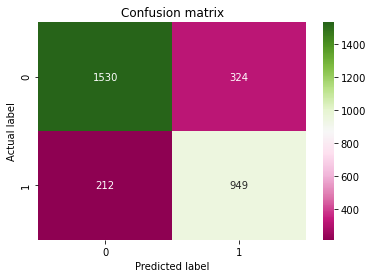

In [503]:
from sklearn.metrics import plot_roc_curve , plot_confusion_matrix, plot_precision_recall_curve
from sklearn.metrics import accuracy_score

print('Accuracy:',metrics.accuracy_score(y_test,Predicted_Class))
print(classification_report(y_test,Predicted_Class))
 
#Confusion Matrix    
cnf_matrix=metrics.confusion_matrix(y_test,Predicted_Class)
p=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='PiYG',fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

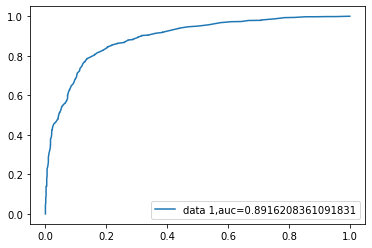

In [504]:
#ROC Curve

y_pred_proba=model_RF.predict_proba(x_test_scaled)[::,1]
fpr,tpr,_ =metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label='data 1,auc='+str(auc))
plt.legend(loc=4)
plt.show()

### From above analysis we can conclude that Accuracy from Random forest on our test data is of 82 % 

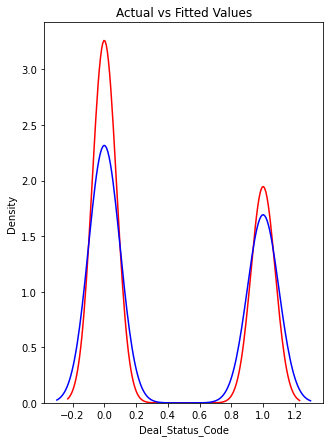

In [506]:
import seaborn as sns
plt.figure(figsize=(5, 7))

ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(Predicted_Class, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values')
plt.show()
plt.close()

## Objective 2 - Important features 

In [507]:
importances = pd.DataFrame({
    'Feature': df.drop(['Deal_Status_Code','Deal_Year'],axis=1).columns,
    'Importance': model_RF.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
Deal_Cost,0.310700
Vp&Manager_Combo,0.245434
Solution_Type,0.138679
Client_Category,0.122797
Sector,0.102645
Location,0.079745


<AxesSubplot:>

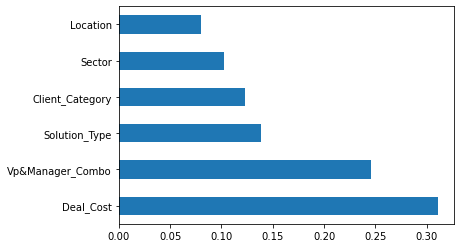

In [508]:
## Feature importance plot based on our model
#feature importance plot

(pd.Series(model_RF.feature_importances_,index=X.columns).nlargest(10).plot(kind='barh'))

### From above graph we can interpret that 'Deal Cost' and 'VP_Manager Combo' are most important feature in deciding the win of a deal/opportunity

## Objective 3 - Top 5 combinations of VP and Manager for winning a deal.

In [509]:
win_data['total_deals']=win_data.groupby(by=['VP_Name','Manager_Name'])['VP_Name'].transform('count')

In [510]:
df_won = win_data[win_data['Deal_Status_Code']=='Won']
df_lost = win_data[win_data['Deal_Status_Code']=='Lost']

df_won['total_won']=df_won.groupby(by=['VP_Name','Manager_Name','Deal_Status_Code'])['VP_Name'].transform('count')

df_lost['total_lost']=df_lost.groupby(by=['VP_Name','Manager_Name','Deal_Status_Code'])['VP_Name'].transform('count')

df_lost = df_lost.filter(['VP_Name', 'Manager_Name','total_deals','total_lost'])
df_won = df_won.filter(['VP_Name', 'Manager_Name','total_deals','total_won'])
df_lost.columns,df_won.columns

(Index(['VP_Name', 'Manager_Name', 'total_deals', 'total_lost'], dtype='object'),
 Index(['VP_Name', 'Manager_Name', 'total_deals', 'total_won'], dtype='object'))

In [511]:
df_final = pd.merge(df_won,df_lost,on=['VP_Name','Manager_Name','total_deals'],how='inner')

In [512]:
df_test = df_final.drop_duplicates()
df_test['%_won'] = df_test['total_won']*100/df_test['total_deals']
df_test['%_lost'] = df_test['total_lost']*100/df_test['total_deals']
df_test = df_test.sort_values(by=['%_won'], ascending=False)
df_test.head(5)

,VP_Name,Manager_Name,total_deals,total_won,total_lost,%_won,%_lost
43427,Ekta Zutshi,Manpreet Singh,22,20,2,90.909091,9.090909
89767,Long Bergstrom,Akshit Khanna,18,16,2,88.888889,11.111111
44065,Rahul Bajpai,Jitendra Choudhary,17,15,2,88.235294,11.764706
26703,Ekta Zutshi,neeraj kumar,46,40,6,86.956522,13.043478
87715,Hardeep Suksma,Atul Chaudhary,15,13,2,86.666667,13.333333


In [513]:
df_test["vp&Manager"] = df_test["VP_Name"].astype(str) +'-'+ df_test["Manager_Name"]

#### Filtering cases where total deals made by VP-Manager combination is greater than 50

In [514]:
df_win_prob=df_test[df_test['total_deals'] > 50]
df_win_prob.head(5)

,VP_Name,Manager_Name,total_deals,total_won,total_lost,%_won,%_lost,vp&Manager
16290,Long Bergstrom,Russell Dahlen,105,75,30,71.428571,28.571429,Long Bergstrom-Russell Dahlen
84460,neeraj kumar,Vinay Kumar,75,51,24,68.000000,32.000000,neeraj kumar-Vinay Kumar
1696,Ekta Zutshi,Jean Sappington,62,40,22,64.516129,35.483871,Ekta Zutshi-Jean Sappington
26955,Ekta Zutshi,Gayle Molter,59,37,22,62.711864,37.288136,Ekta Zutshi-Gayle Molter
87795,Jewell Tunstall,Atul Chaudhary,55,29,26,52.727273,47.272727,Jewell Tunstall-Atul Chaudhary


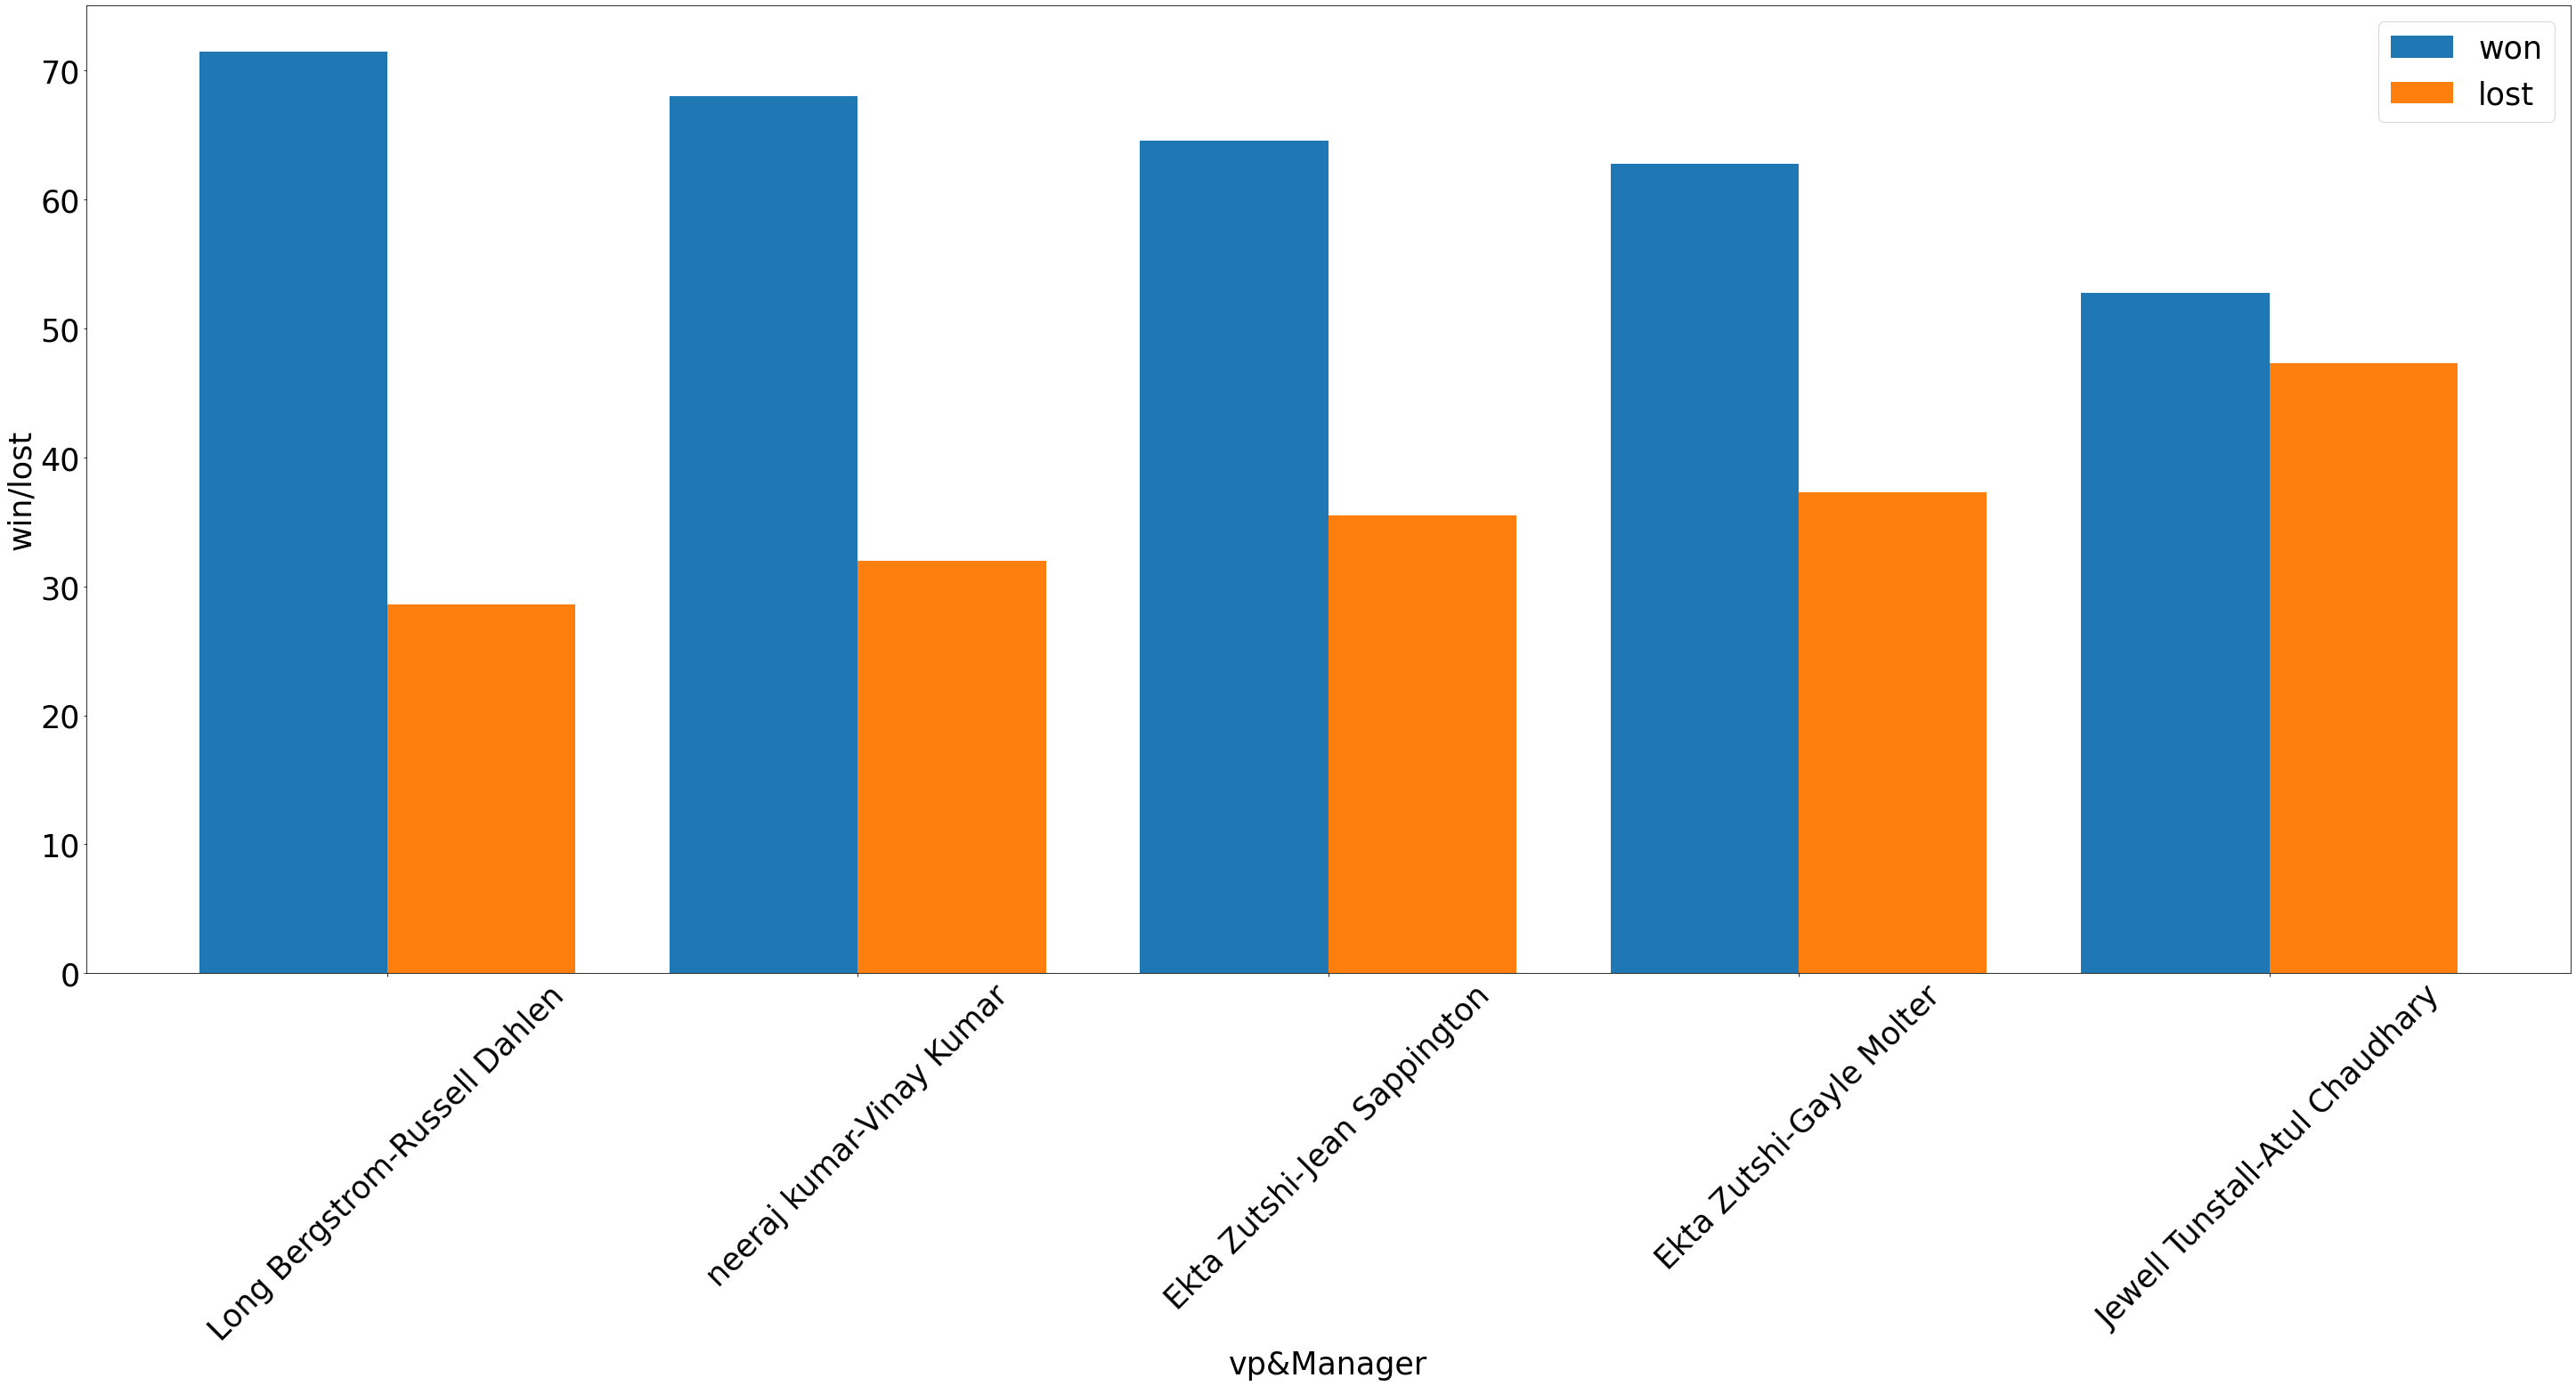

In [515]:
df_10=df_win_prob.head(5)

plt.rcParams.update({'font.size': 35})
plt.figure(figsize=(50,20)) 

X_axis = np.arange(len(df_10['vp&Manager']))
plt.bar(X_axis - 0.2, df_10['%_won'], 0.4, label = 'won')
plt.bar(X_axis + 0.2, df_10['%_lost'], 0.4, label = 'lost')
  
plt.xticks(X_axis,df_10['vp&Manager'],rotation=45)
plt.xlabel("vp&Manager")
plt.ylabel("win/lost")


plt.legend()
plt.show()

Thus from above analysis we got our top 5 VP-Manager combinations:

- We have found top 5 combination of VP and Manager on the basis of percentage of deals won by them
- Total deals made by all the combinations ranged from 1 to 213. There were many cases where combination has made only 1 or 2 deals and won the same so the percentage of winning was 100%
- So, to deal with this biasness, we have considered only those combinations who have made total deals greater than 50 and then sort on the basis of their percentage of winning deals


## Objective 4- Calculating the loss against each false prediction

### For every record where actual class was 1 and predicted is 0, loss would be occured, this is type 2 error which has 212 records,let's calculate loss for these records

In [516]:
## Adding Prediction to test data.

x_test['Deal_Status_Code']=y_test
x_test['Predicted_Class']=Predicted_Class

In [517]:
x_test.head()

,Client_Category,Solution_Type,Sector,Location,Deal_Cost,Vp&Manager_Combo,Deal_Status_Code,Predicted_Class
5714,3,63,3,0,201,389,1,1
4477,10,3,7,5,482,231,0,0
9207,15,33,17,7,1325,680,0,0
1054,6,54,11,11,1473,506,0,0
4569,35,3,15,9,1030,464,0,0


In [518]:
x_test[(x_test['Deal_Status_Code']== 1 ) & (x_test['Predicted_Class']== 0)]['Deal_Cost'].count()

212

In [519]:
x_test[(x_test['Deal_Status_Code']== 1 ) & (x_test['Predicted_Class']== 0)]['Deal_Cost'].sum()

146227

### Total loss against false prediction is 1,46,227

# Bonus activity: Recommendations and Insights


Based on extensive analysis and modelling, below are our recommendations to the client:

### 1. Among the many VP and Manager combinations, the outperforming combinations are as follows -
Below are the top 10 VP-Manager combinations that are recommended for future deals on the basis of their highest winning percentages.

In [390]:
df_win_prob=df_test[df_test['total_deals'] > 10]
df_win_prob.head(10)

,VP_Name,Manager_Name,total_deals,total_won,total_lost,%_won,%_lost,vp&Manager
43427,Ekta Zutshi,Manpreet Singh,22,20,2,90.909091,9.090909,Ekta Zutshi-Manpreet Singh
89767,Long Bergstrom,Akshit Khanna,18,16,2,88.888889,11.111111,Long Bergstrom-Akshit Khanna
44065,Rahul Bajpai,Jitendra Choudhary,17,15,2,88.235294,11.764706,Rahul Bajpai-Jitendra Choudhary
26703,Ekta Zutshi,neeraj kumar,46,40,6,86.956522,13.043478,Ekta Zutshi-neeraj kumar
87715,Hardeep Suksma,Atul Chaudhary,15,13,2,86.666667,13.333333,Hardeep Suksma-Atul Chaudhary
70471,Long Bergstrom,Rayford Durgan,27,23,4,85.185185,14.814815,Long Bergstrom-Rayford Durgan
25941,Earline Langton,Neha Sharma,11,9,2,81.818182,18.181818,Earline Langton-Neha Sharma
13607,Hardeep Suksma,ram kumar,11,9,2,81.818182,18.181818,Hardeep Suksma-ram kumar
44299,Ekta Zutshi,Chanchal sharma,21,17,4,80.952381,19.047619,Ekta Zutshi-Chanchal sharma
80640,neeraj kumar,Dennis Faux,17,13,4,76.470588,23.529412,neeraj kumar-Dennis Faux


In [397]:
#Making dataset with winning cases only
df_win = win_data[win_data['Deal_Status_Code']=='Won']
def Largest_10(col):
    print(df_win[[col]].value_counts().nlargest(10))

### 2. Among the numerous Client categories, the categories that yield high success rate along with quantity of wins are as follows -
Below are the top 10 client categories that are recommended for future deals. It can be seen that highest performing Client category is 'Internal' with the total win count of 760 deals

In [395]:
Largest_10('Client_Category')

Client_Category     
Internal                760
Others                  652
Services_based          408
Tech                    313
Consulting              170
International Bank      160
Telecom                 135
Power ind               112
Finance                 109
Domestic Public Bank     95
dtype: int64


### 3. Among the many sectors, the ones with the highest win rate are as follows-
Below are the top 10 performing sectors. It can be recommended that future deals can be made in 'Sector 23' since it has highest record of 1053 of winning deals 

In [396]:
Largest_10('Sector')

Sector   
Sector 23    1053
Sector 2      596
Sector 20     389
Sector 24     218
Sector 12     201
Sector 17     200
Sector 9      167
Sector 16     158
Sector 15     153
Sector 25      95
dtype: int64


### 4. Among the numerous types of solutions, the ones with the best win rate are as follows-
Below are the top 10 types of solutuions. It can be recommended that future deals can be made through 'Solution 32' since it has highest winning count of 813 as compared to other solution types

In [398]:
Largest_10('Solution_Type')

Solution_Type
Solution 32      813
Solution 9       400
Solution 10      326
Solution 39      281
Solution 37      186
Solution 8       184
Solution 67      176
Solution 59      154
Solution 4       129
Solution 29       99
dtype: int64


# Developing Business sense

### Trend Analysis

In [399]:
Largest_10('Deal_Year')

Deal_Year
2018         843
2017         649
2016         570
2015         514
2014         402
2013         363
2012         262
2019         111
2011          41
dtype: int64


In [414]:
Largest_10('MONTH')

MONTH    
December     358
January      340
November     337
May          330
October      330
August       328
September    326
July         305
March        289
February     279
dtype: int64


In [424]:
win_data.Deal_Cost.mean()

780978.5028956176

#### A trend analysis is performed to develop the business sense for the IT firm. Following are the insights from the above analysis:
- It can be observed from the data that the IT firm is growing year by year.
- A growth rate of approx 20% is observed from 2011 to 2018 with the average deal cost of 7,80,978.
- The total deals won increased from 41 deals in 2011 to 843 deals in 2018. 
- Most of the deals are won in December month followed by January and November. 

Thus with the help of top 5 VP-manager combinations along with best performing sectors and solution type, the firm can achieve higher success in upcoming years.